In [16]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [51]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adadelta(),
                  metrics=['acc'])
    return model

In [52]:
# training parameters
batch_size = 32
epochs = 50

In [53]:
# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 2.2571 - acc: 0.1611 - val_loss: 2.1259 - val_acc: 0.2736
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 2.0971 - acc: 0.2670 - val_loss: 1.9647 - val_acc: 0.4545
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 1.9441 - acc: 0.3780 - val_loss: 1.7991 - val_acc: 0.6086
Epoch 4/50
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7958 - acc: 0.4694 - val_loss: 1.6367 - val_acc: 0.6952
Epoch 5/50
1875/1875 [==============================] - 13s 7ms/step - loss: 1.3161 - acc: 0.6475 - val_loss: 1.1131 - val_acc: 0.8104
Epoch 9/50
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2276 - acc: 0.6695 - val_loss: 1.0215 - val_acc: 0.8249
Epoch 10/50
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1541 - acc: 0.6876 - val_loss: 0.9438 - val_acc: 0.8352
Epoch 11/50
1875/1875 [==============================]

In [54]:
model_DNN.save(filepath="NNs/test_adadelta.h5", include_optimizer=True)
np.save('NNs/test_adadelta.npy',history.history)

In [44]:
model = tf.keras.models.load_model(filepath="NNs/test_adagrad.h5")
history1=np.load('NNs/test_adagrad.npy',allow_pickle='TRUE').item()

313/313 [==============================] - 2s 5ms/step - loss: 0.3419 - acc: 0.9143

Test loss: 0.34191185235977173
Test accuracy: 0.9143000245094299


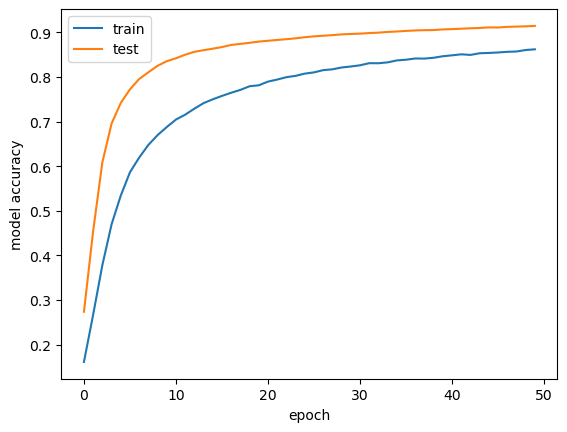

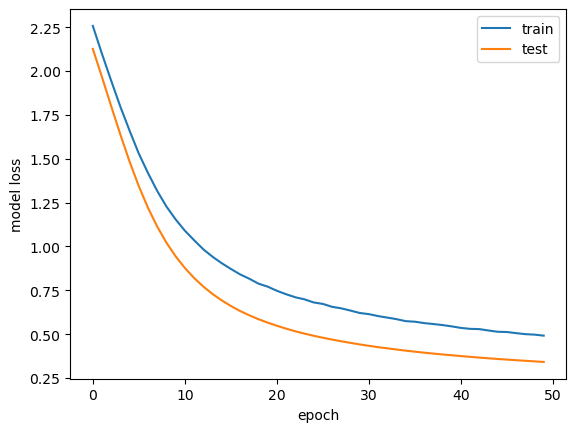

In [55]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()